# Analyzing Time Series Data

#### 1. Import libraries and data

In [1]:
#Import libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 

In [2]:
#Configure API key 
quandl.ApiConfig.api_key = 'tWdSsS99-e1wQEYjr44s'

In [3]:
#Import data
data = quandl.get('FRED/NROUST')
#Analyzing short-term rate of unemployment -- could not incorporate NFL analysis with time series accurately

In [4]:
#View data
data.head()

,Value
Date,
1949-01-01,5.255053
1949-04-01,5.261516
1949-07-01,5.268013
1949-10-01,5.274564
1950-01-01,5.281182


In [5]:
#View data shape
data.shape

(332, 1)

In [6]:
#View data columns
data.columns

Index(['Value'], dtype='object')

In [7]:
#Check for missing values
data.isnull().sum()

Value    0
dtype: int64

In [8]:
#Check for duplicates
dups = data.duplicated()
dups.sum()

0

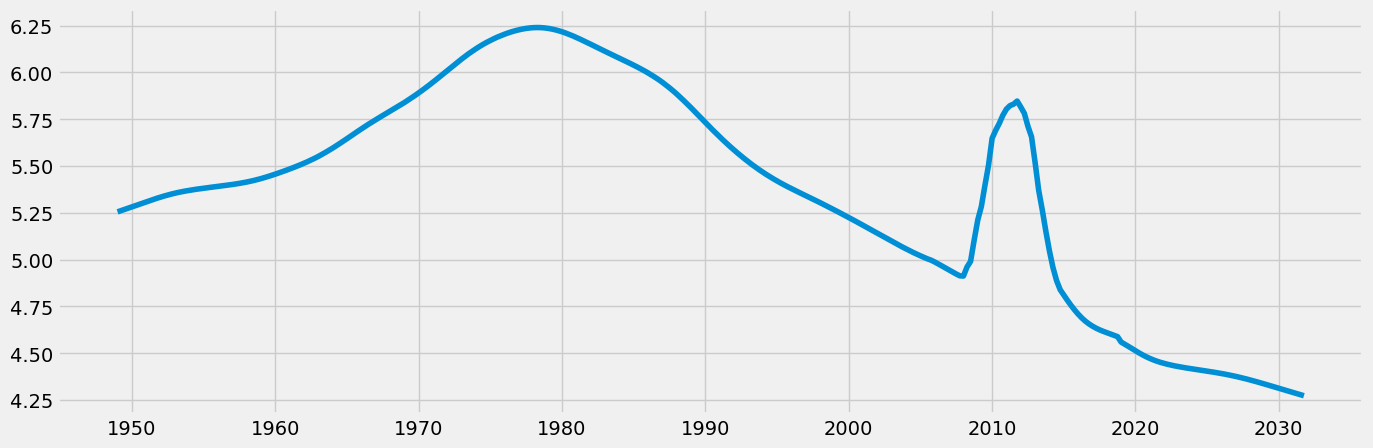

In [9]:
#Plot data 
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

#### 3. Time-series analysis: decomposition

In [10]:
data

,Value
Date,
1949-01-01,5.255053
1949-04-01,5.261516
1949-07-01,5.268013
1949-10-01,5.274564
1950-01-01,5.281182
...,...
2030-10-01,4.294982
2031-01-01,4.289282
2031-04-01,4.283630


In [11]:
#Decompose time series using additive model
decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [12]:
#Define a fixed size for all special charts
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

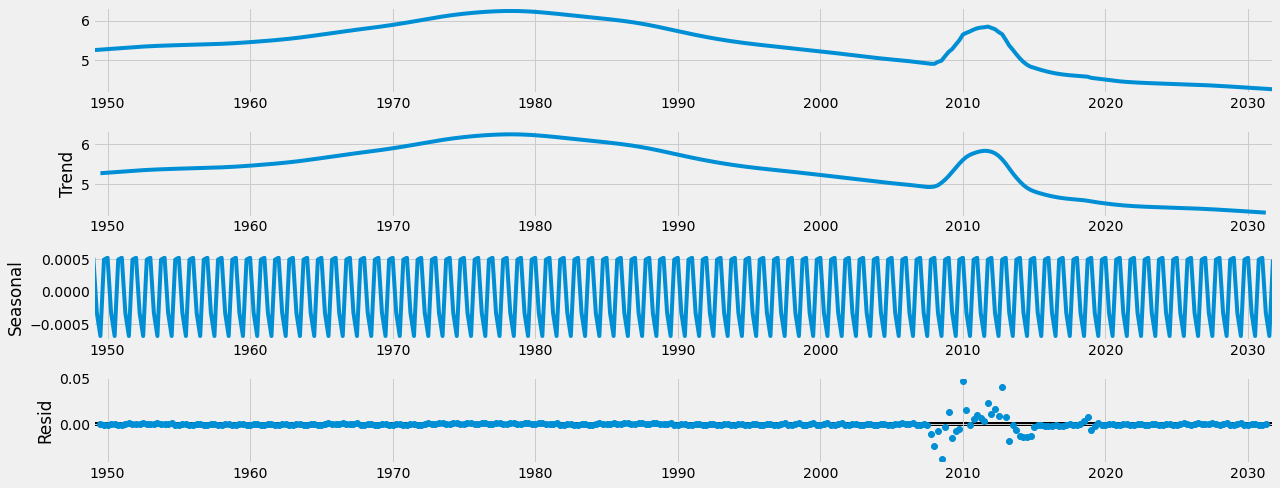

In [13]:
#Plot separate components
decomposition.plot()
plt.show()

#### 4. Testing for stationarity

In [14]:
#Run Dickey-Fuller stationarity test
from statsmodels.tsa.stattools import adfuller #Import adfuller() function

def dickey_fuller(timeseries): #Define function
    #Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity Test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Value'])

Dickey-Fuller Stationarity Test:
Test Statistic                  -0.686934
p-value                          0.850105
Number of Lags Used             17.000000
Number of Observations Used    314.000000
Critical Value (1%)             -3.451349
Critical Value (5%)             -2.870789
Critical Value (10%)            -2.571698
dtype: float64


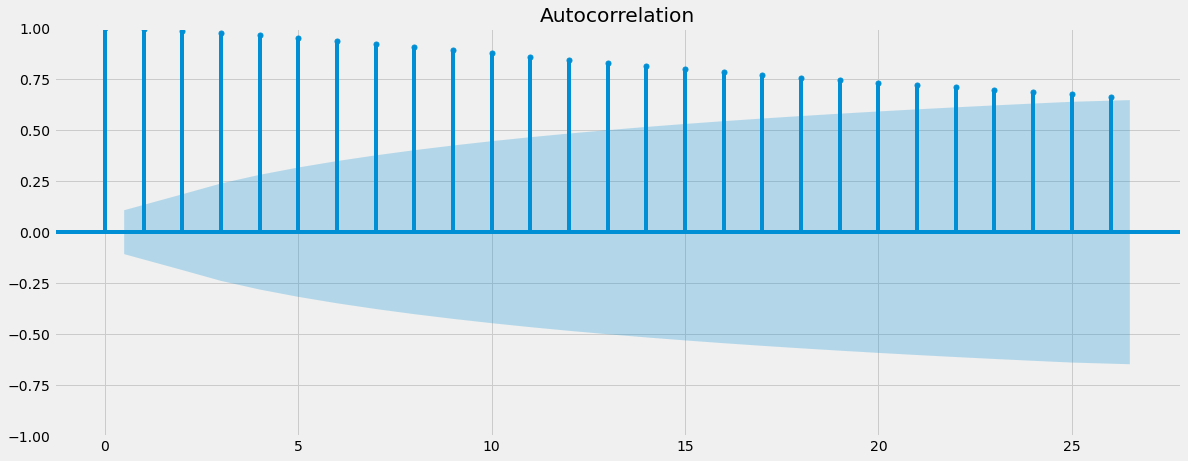

In [15]:
#Plot autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data)
plt.show()

#### 5. Stationarizing data

In [16]:
#Differencing data
data_diff = data - data.shift(1)

In [17]:
#Remove missing values as a result of differencing
data_diff.dropna(inplace = True) 

In [18]:
#View data
data_diff.head()

,Value
Date,
1949-04-01,0.006463
1949-07-01,0.006497
1949-10-01,0.006551
1950-01-01,0.006618
1950-04-01,0.006684


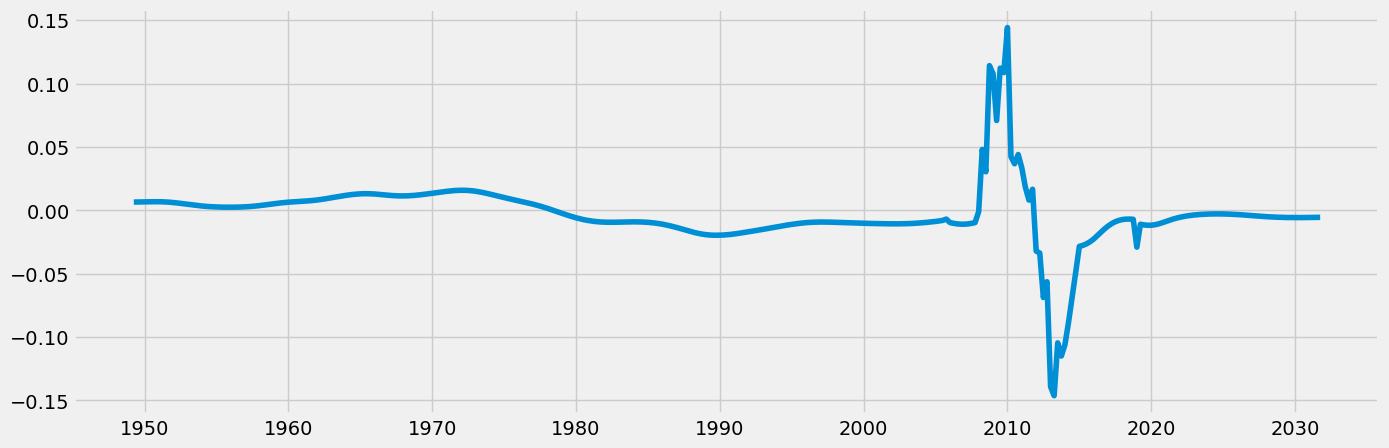

In [19]:
#Plot differencing data

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [20]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity Test:
Test Statistic                  -2.959412
p-value                          0.038863
Number of Lags Used             16.000000
Number of Observations Used    314.000000
Critical Value (1%)             -3.451349
Critical Value (5%)             -2.870789
Critical Value (10%)            -2.571698
dtype: float64


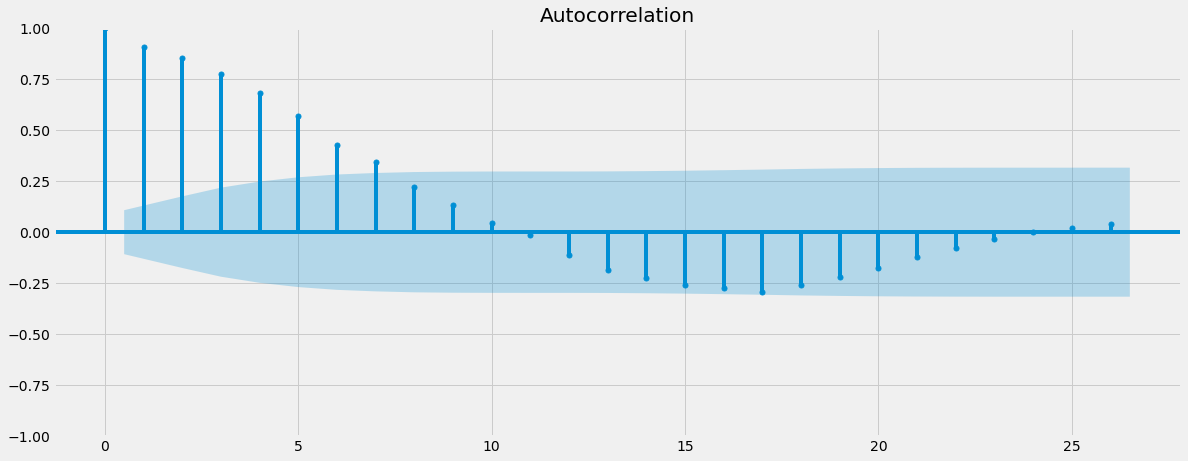

In [21]:
#Plot autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_diff)
plt.show()